In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import qr

# Define the grid
n = 1024
x = np.linspace(-1, 1, n)

# Define values of p
p_values = np.linspace(0.3, 2.5, 10)

# Define s
s = 0.05

# Initialize a list to store orthogonalized functions
orthogonalized_functions = []

# Define the polynomials x^q for q = 0 to 8
polynomials = [x**q for q in range(9)]

# Loop over different values of p
for p in p_values:
    # Compute the function exp(-|x/s|^p)
    f = np.exp(-np.abs(x/s)**p)
    
    # Initialize a list to store orthogonalized polynomials
    orthogonalized_polynomials = []
    
    # Orthogonalize each polynomial with respect to f
    for poly in polynomials:
        # Create a matrix with columns [f, poly]
        A = np.vstack((f, poly)).T
        
        # Perform QR orthogonalization
        Q, _ = qr(A)
        
        # Append the orthogonalized polynomial to the list
        orthogonalized_poly = Q[:, 1]
        orthogonalized_polynomials.append(orthogonalized_poly)
    
    # Append the orthogonalized polynomials for this p to the result list
    orthogonalized_functions.append(orthogonalized_polynomials)


In [5]:
polynomials.shape

AttributeError: 'list' object has no attribute 'shape'

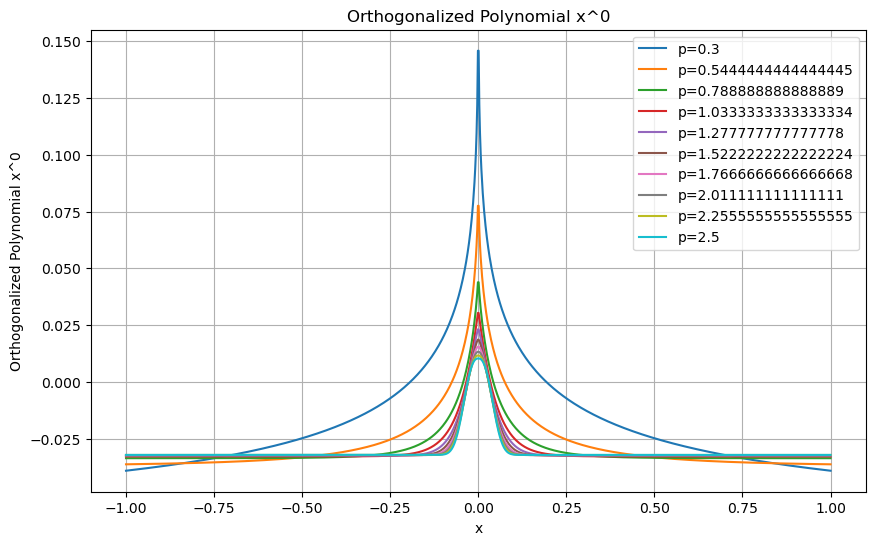

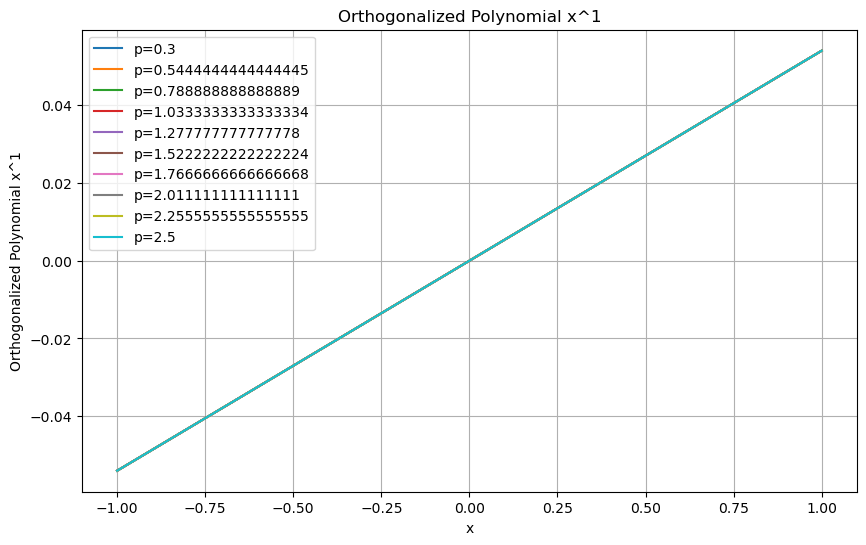

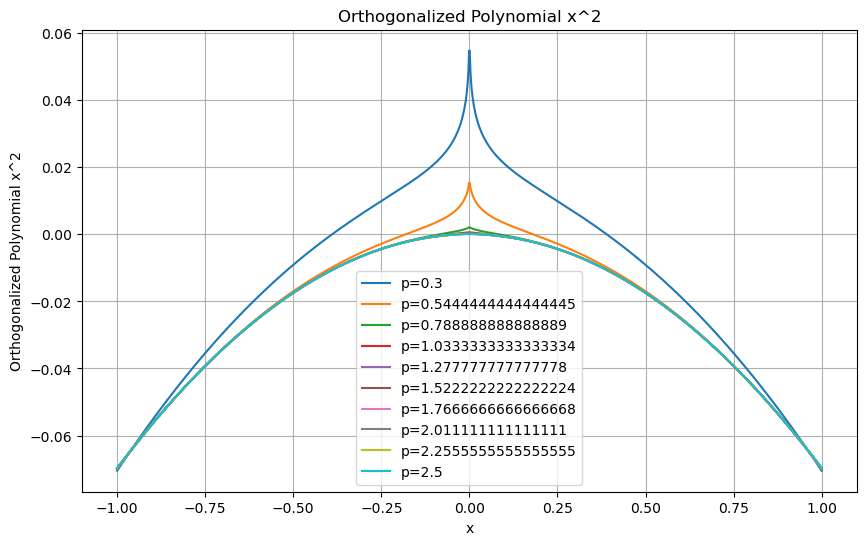

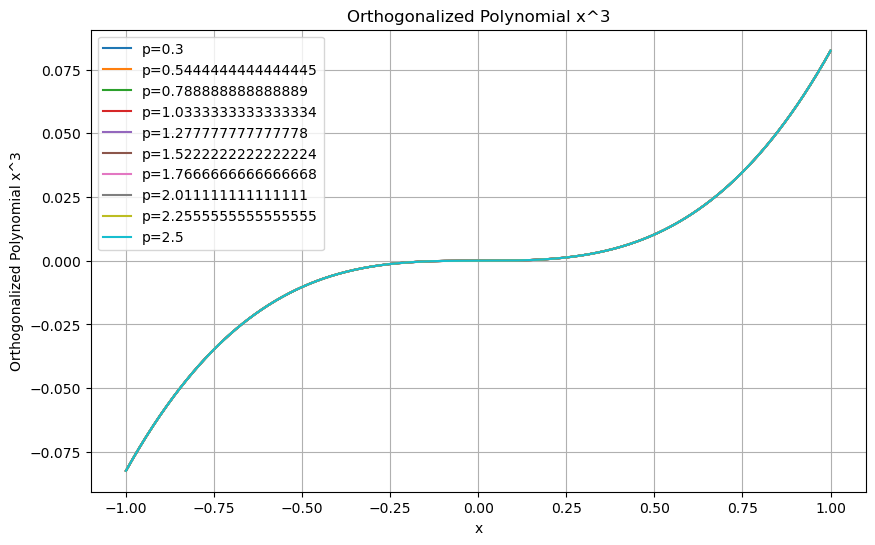

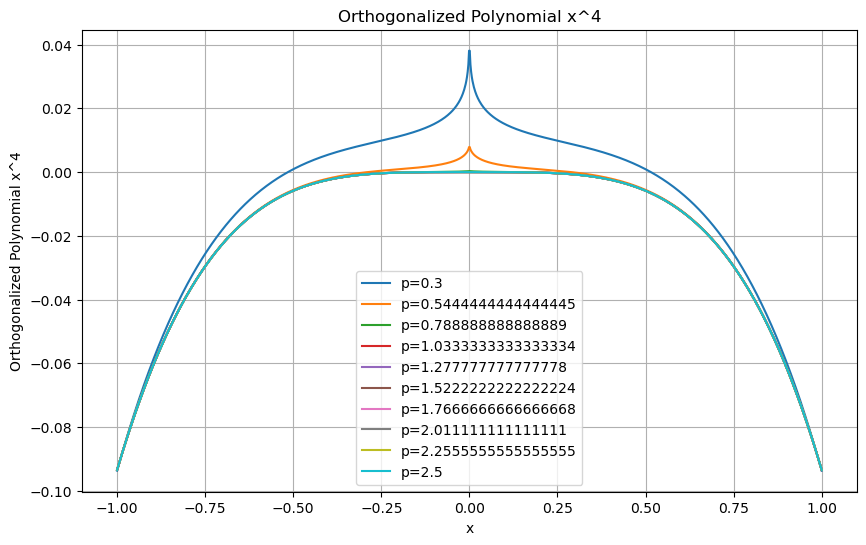

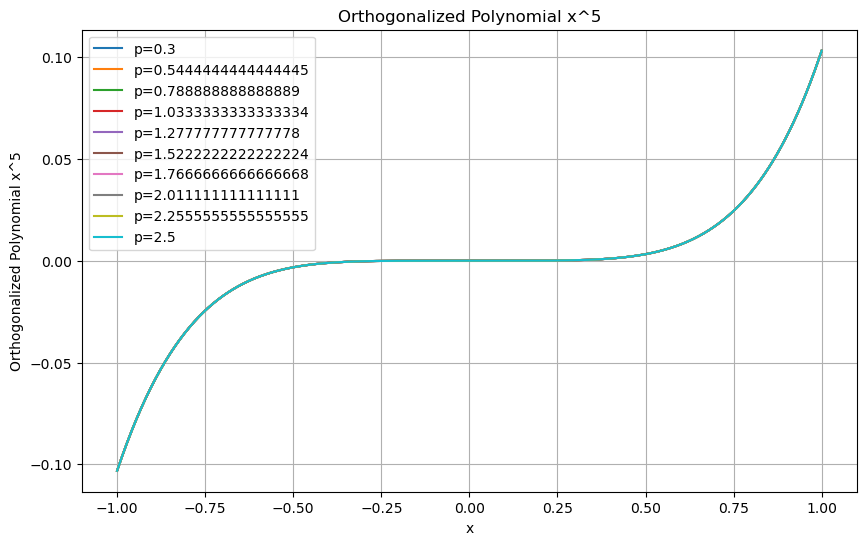

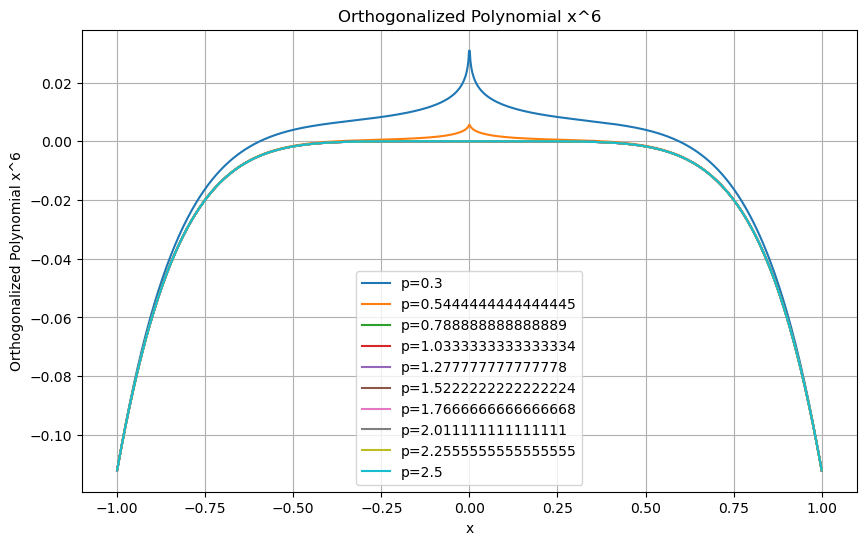

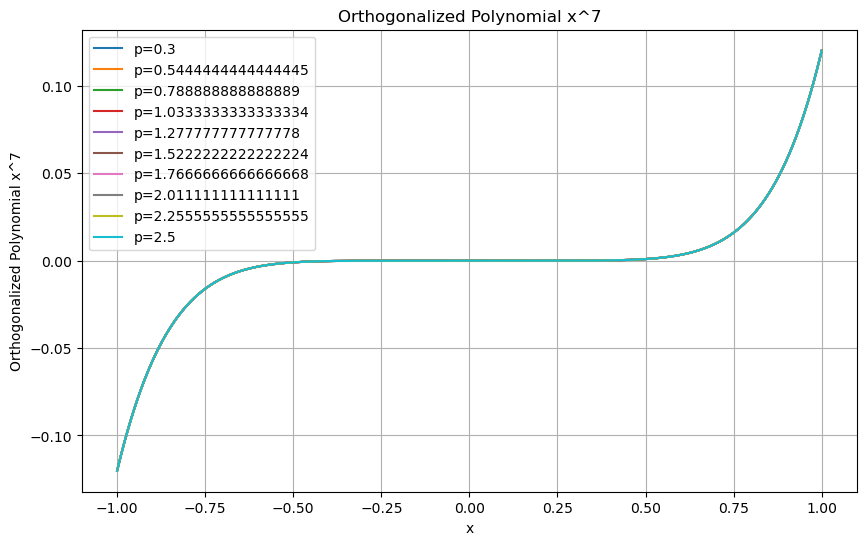

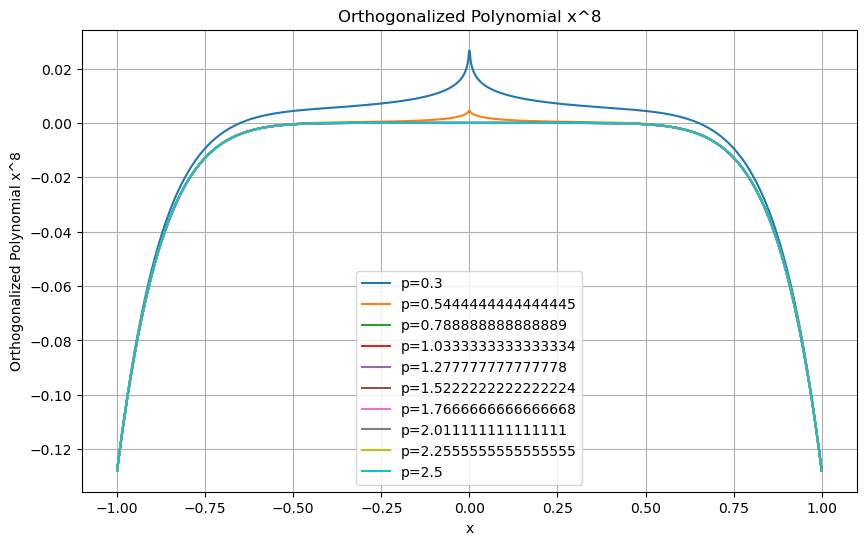

In [3]:
# Plot the evolution of orthogonalized functions with p
for q, orthogonalized_polynomials in enumerate(orthogonalized_functions[0]):
    plt.figure(figsize=(10, 6))
    plt.title(f'Orthogonalized Polynomial x^{q}')
    
    for i, p in enumerate(p_values):
        plt.plot(x, orthogonalized_functions[i][q], label=f'p={p}')
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel(f'Orthogonalized Polynomial x^{q}')
    plt.grid()
    plt.show()